In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

import time

In [6]:
#CSN_path = './'
CSN_path = './Data/'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

CSN_new_A = CSN_new[-18:] #assign the last 18 examples for 18 test cases for a different array

CSN_prepared_B = CSN_new[:-18] # Removing the last 18 
CSN_hold_1 = sklearn.utils.shuffle(CSN_prepared_B, random_state=5946) #shuffling the 206 data examples as Clyde did
tsize1 = CSN_hold_1.shape[0]//10 # decide the size of the test examples which is 20 - clyde did it

CSN_prepared_B = CSN_hold_1[:-tsize1] #Remove that 20 data examples from the bottom of the list
CSN_test = CSN_hold_1[-tsize1:] # assign that 20 data examples whcih we will use later



In [7]:
out = np.load('Data/true_test_186_100_real_20_clydetookout_test20_L.pkl', allow_pickle=True)

In [8]:
n = 100



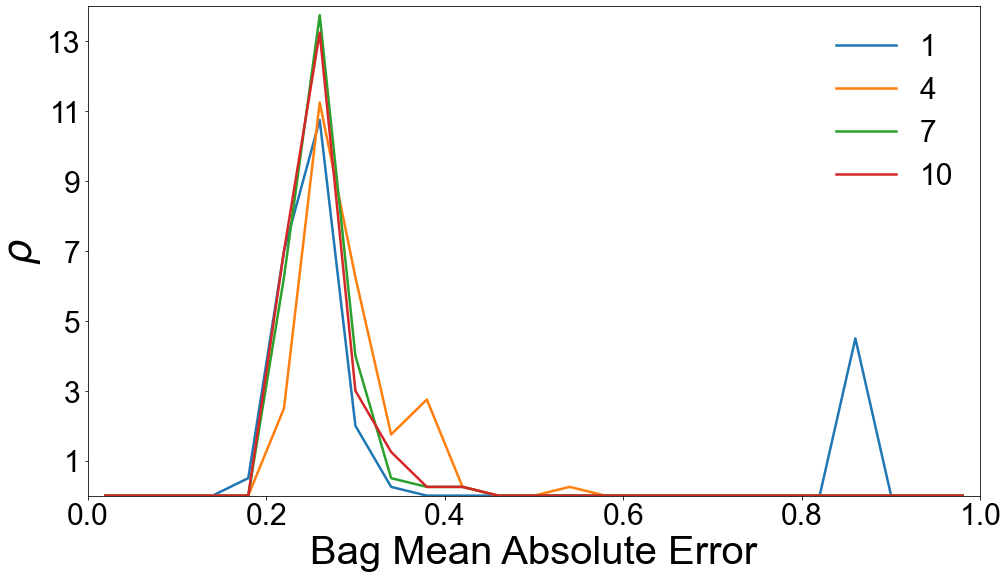

In [5]:
maes = np.array([[np.mean(np.abs(out[j, i, 0, :]-
                CSN_test['Viability Fraction '].values)) for j in np.arange(n)] for i in np.arange(4)])

plt.figure(figsize=(16,9))
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel(r'$\rho$', fontsize=40)
plt.xlabel('Bag Mean Absolute Error', fontsize=40)

k = ['1', '4', '7', '10']
#[plt.plot(np.histogram(maes[i]), label=k[i]) for i in np.arange(4)]

for i in range(4):
    #axes[i, 0].plot(rnetsplit[i], 'bo')
    #axes[i, 0].set_ylim(0, 1.5)
       
    hist = np.histogram(maes[i], bins=25, 
                        range=(0, 1), density=True)
    
    x = hist[1][:-1]/2 + hist[1][1:]/2
    y = hist[0]

    plt.plot(x, y, label=k[i], lw=2.5)

#plt.xticks(np.arange(5))
plt.xlim(0, 1.0)
plt.yticks(np.arange(1, 15, 2))
plt.ylim(0, 14)
plt.legend(fontsize=30, framealpha=0.0)
plt.savefig('final_hist.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [9]:
[np.average(np.abs(out[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values)) for i in np.arange(4)]

[0.36130756204081776,
 0.2884659094665161,
 0.258613924540344,
 0.25767466095130337]

In [11]:
[np.std(np.abs(out[:n, i, 0, :]
                   -CSN_test['Viability Fraction '].values))/np.sqrt(n) for i in np.arange(4)]

[0.03853710149461453,
 0.026442448356144378,
 0.025731135653701692,
 0.02552080448840774]